# Desafío 1: Determinantes del ingreso

## Preliminares

### Problema

El problema consiste en el desarrollo de un modelo predictivo de **clasificación** para saber, en base a atributos sociodemográficos, si el salario de un sujeto está sobre o bajo los 50.000 dólares anuales.

A continuación se presenta el modelo a estimar:

$$\log\left(\frac{p({ income=1})}{1 - p({ income=1})}\right)={{\beta }_{0} + \sum_{i=1} {\beta }_{i} \cdot {X_{i}}}$$

Donde $X_{i}$ corresponden a los atributos sociodemográficos e $income$ es 1 cuando un sujeto está bajo los 50.000 dólares anuales y 0 si no.

### Métricas de desempeño

Como este es un problema de clasificación, nos centraremos en la predicción de la clasificación para una nueva observación. Para lo cual se utilizarán las siguientes métricas:

- Matrix de confusión: cantidad de observaciones predichas de forma correcta.
- Accuracy (exactitud): porcentaje de casos predichos correctamente por sobre el total de casos.
- Precision: mide la fracción de predicciones correctas entre las etiquetas positivas.
- Recall: Mide la fraccion de verdaderos positivos predichos por el modelo.
- F1: representa la media armónica entre Precision y Recall (es decir, una medida general de la presición).
- ROC (en particular, _AUC_): evalúa la relación entre ambos errores (falsos positivos y falso negativo) condicional en todo el rango del clasificador.

Debido a que este modelo será utilizado para erradicar las diferencias socieconómicas, lo importante es no centrarse en la exactitud de la predicción, si no que poner especial énfasis en $precision$ y $recall$. Si solo nos centráramos en la exactitud, puede pasar que tengamos muchos falsos negativos con lo cual podríamos dejar fuera a personas que necesitan ayuda.

### Descripción de la base de datos

- `age`: Edad del individuo.
- `workclass`: Naturaleza de la organización que emplea al individuo.
- `education`: Nivel educacional del individuo:Bachelors (Licenciado), Some-college (Superior incompleta), 11th (3ro medio), HS-grad (Secundaria completa), Prof-school (Escuela profesional), Assoc-acdm (Técnico superior administrativo) , Assoc-voc (Técnico superior vocacional), 9th (1ro medio), 7th-8th (7mo-8vo), 12th (4to medio), Masters (Maestría de postgrado), 1st-4th (1ro-4to básico), 10th(2do medio), Doctorate (Doctorado), 5th-6th (5to-6to), Preschool (Preescolar).
- `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado = Ingresos generados por inversiones fuera del trabajo asalariado.
- `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
- `fnlwgt` : Ponderador muestral.
- `marital-status`: Estado civil del individuo: Married-civ-spouse (Casado/a régimen civil), Divorced (Divorciado/a), Never-married (Soltero/a), Separated (Separado/a), Widowed (Viudo/a), Married-spouse-absent (Casado con esposo/a ausente), Married-AF-spouse (Casado/a régimen castrense).
- `occupation`: Ocupación del individuo: Tech-support (Soporte técnico), Craft-repair (Reparaciones), Other-service (Otros servicios), Sales (Ventas), Exec-managerial (Ejecutivo administrativos), Prof-specialty (Profesores), Handlers-cleaners (Aseo y ornato), Machine-opinspct (Inspectores de maquinarias), Adm-clerical (Administrativos servicio al cliente), Farmingfishing (Pesca-ganadería), Transport-moving (Transporte), Priv-house-serv (Asesor del hogar), Protective-serv (servicios de seguridad), Armed-Forces (Fuerzas armadas).
- `relationship`: Relación respecto a su familia Wife(Esposa), Own-child (hijo único), Husband (Esposo), Not-in-family (No pertenece a la familia), Other-relative (Familiar de otro tipo), Unmarried (Soltero).
- `race`: Raza del encuestado White(Blanco caucásico), Asian-Pac-Islander (Isleño del Asia Pacífico), Amer-Indian-Eskimo (Pertenenciente a pueblos originarios), Other (Otro grupo), Black (Afroamericano).
- `sex`: Sexo del encuestado.
- `hours-per-week`: Cantidad de horas trabajadas por semana.
- `native-country`: País de origen. United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands.
- `income`: <=50K Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, >50K si el individuo percibe ingresos superiores a 50.000 dólares anuales. (**Vector Objetivo**)

## Aspectos computacionales

### Librerías a utilizar

- `pandas`: manipulación y análisis de datos.
- `numpy`: biblioteca de funciones matemáticas de alto nivel para operar con vectores o matrices.
- `scipy.stats`: contiene una gran cantidad de distribuciones de probabilidad y de funciones estadísticas.
- `matplotlib.pyplot`: nos permite mostrar gráficos.
- `seaborn`: librería especializada para gráficos estadísticos.
- `sklearn`: herramientas para análisis de datos y minería de datos. En particular se utilizará:
    - `linear_model`: módulo para trabajar con regresión donde el valor target es una combinación lineal de los features. Utilizaremos en este caso `LogisticRegression`.
    - `metrics`: módulo para obtener métricas de nuestros modelos (`roc_curve`, `roc_auc_score`, `confusion_matrix`, `classification_report`).
    - `model_selection`: de aquí se utilizará `train_test_split` para dividir nuestro datos en un set de entrenamiento y en un set de validación.
    - `preprocessing`: funciones para transformar datos en una representación más adecuada para los estimadores.
- `statsmodel`: provee clases y funciones para la estimación de distintos modelos estadísticos, así como para la realización de pruebas estadísticas y la exploración de datos estadísticos.
- `missingno`: librería para la visualización de datos perdidos.
- `factor_analyzer`: librería para el análisis factorial.
- `warnings`: será utilizada para evitar avisos de deprecación.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix,roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import factor_analyzer as factor
import missingno as msngo
import warnings
import auxiliary as nicos

warnings.filterwarnings('ignore')

### Proceso de preprocesamiento y recodificación de datos

El proceso de preprocesamiento y recodificación de los datos consistirá en lo siguiente:

1. Análisis de cada columna (tipos de datos)
2. Los casos perdidos que están codificados como `?` serán transformados a `NaN`.
3. Se recodificarán las siguientes variables:
    - `occupation` debe recodificarse como collars siguiendo una nomenclatura similar a:
        - white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales, Tech-support.
        - blue-collar $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
        - others $\leftarrow$ Other-service, Armed-Forces
    - `workclass` debe recodificarse como workclass_recod siguiendo una nomenclatura similar a:
        - federal-gov $\leftarrow$ Federal-gov.
        - state-level-gov $\leftarrow$ State-gov, Local-gov.
        - self-employed $\leftarrow$ Self-emp-inc, Self-emp-not-inc
        - unemployed $\leftarrow$ Never-worked, Without-pay.
    - `education` debe recodificarse como educ_recod siguiendo una nomenclatura similar a:
        - preschool $\leftarrow$ Preschool
        - elementary-school $\leftarrow$ 1st-4th, 5th-6th
        - high-school $\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
        - college $\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
        - university $\leftarrow$ Bachelors, Masters, Prof-school, Doctorate
    - `marital-status` debe recodificarse como civstatus siguiendo una nomenclatura similar a :
        - married $\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AFspouse
        - divorced $\leftarrow$ Divorced
        - separated $\leftarrow$ Separated
        - widowed $\leftarrow$ Widowed.
    - `native-country` debe recodificarse como region donde cada país debe asignarse a uno de los 5 continentes.
    - `income` debe recodificarse de forma binaria.
3. Para las columnas que guardan valores categóricos, dependiendo del significado de la columna, se crearán nuevas columnas binarias para cada categoría o se asignará valores ordinales.

### Funciones

- `describe_columns(df)`, función que dado un `DataFrame` `df` reporta las medidas descriptivas de cada columna. Para columnas con valores numéricos, utilizará `describe`, mientras para las columnas con atributos discretos utilizará `value_counts`.
- `plot_columns_behaviour(df)`, función que dado un `DataFrame` `df`, grafica histogramas para los atributos contínuos y gráficos de barra los discretos.

In [2]:
original_df = pd.read_csv('income-db.csv')
original_df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Análisis de cada columna

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Recodificación de casos perdidos

In [4]:
df = original_df.copy()
for col in df:
    missing = df[col] == '?'
    missing_count = sum(missing)
    if missing_count > 0:
        print(col, 'tiene', missing_count, 'casos perdidos que serán recodificados a None')
        df[missing] = None

workclass tiene 2799 casos perdidos que serán recodificados a None
occupation tiene 10 casos perdidos que serán recodificados a None
native-country tiene 811 casos perdidos que serán recodificados a None


#### Recodificación de variables

In [5]:
# Guardamos las reglas de recodificación
recodification_rules = {
    'occupation': {
        'to': 'collars',
        'rules': {
            'white-collar': [
                'Prof-specialty',
                'Exec-managerial',
                'Adm-clerical',
                'Sales',
                'Tech-support'
            ],
            'blue-collar': [
                'Craft-repair',
                'Machine-op-inspct',
                'Transport-moving',
                'Handlers-cleaners',
                'Farming-fishing',
                'Protective-serv',
                'Priv-house-serv'],
            'others': [
                'Other-service',
                'Armed-Forces'
            ],
        },
    },
    'workclass': {
        'to': 'workclass_recod',
        'rules': {
            'private': ['Private'],
            'federal-gov': ['Federal-gov'],
            'state-level-gov': ['State-gov', 'Local-gov'],
            'self-employed': ['Self-emp-inc', 'Self-emp-not-inc'],
            'unemployed': ['Never-worked', 'Without-pay'],
        },
    },
    'education': {
        'to': 'educ_recod',
        'rules': {
            'preschool': ['Preschool'],
            'elementary-school': ['1st-4th', '5th-6th'],
            'high-school': ['7th-8th', '9th', '10th', '11th', '12th', 'HS-grad'],
            'college': ['Assoc-voc', 'Assoc-acdm', 'Some-college'],
            'university': ['Bachelors', 'Masters', 'Prof-school', 'Doctorate'],
        },
    },
    'marital-status': {
        'to': 'civstatus',
        'rules': {
            'married': ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
            'divorced': ['Divorced'],
            'separated': ['Separated'],
            'widowed': ['Widowed'],
            'never-married': ['Never-married'],
        },
    },
    'income': {
        'to': 'income',
        'rules': {
            1: ['>50K'],
            0: ['<=50K'],
        },
    },
    'native-country': {
        'to': 'continent',
        'rules': {
            'asia': [
                'Philippines',
                'India',
                'China',
                'Japan',
                'Vietnam',
                'Iran',
                'Taiwan',
                'Thailand',
                'Hong',
                'Cambodia',
                'Laos',
            ],
            'australia': ['Outlying-US(Guam-USVI-etc)'],
            'europe': [
                'Germany',
                'England',
                'Italy',
                'Poland',
                'Portugal',
                'Greece',
                'France',
                'Ireland',
                'Yugoslavia',
                'Scotland',
                'Hungary',
                'Holand-Netherlands',
            ],
            'north-america': [
                'United-States',
                'Mexico',
                'Puerto-Rico',
                'Canada',
                'El-Salvador',
                'Jamaica',
                'Dominican-Republic',
                'Guatemala',
                'Haiti',
                'Nicaragua',
                'Honduras',
            ],
            'south-america': [
                'Cuba',
                'South',
                'Columbia',
                'Peru',
                'Ecuador',
                'Trinadad&Tobago',
            ],
        },
    },
}

In [6]:
# Recodificamos:

df_recod = df.copy()

for original_column in recodification_rules:
    new_column = recodification_rules[original_column]['to']
    rules = recodification_rules[original_column]['rules']
    
    print('Recodificando', original_column, 'a', new_column)

    df_recod[new_column] = None

    for new_value, original_values in rules.items():
        df_recod.loc[df[original_column].isin(original_values), new_column] = new_value

    print(df_recod[new_column].value_counts(), '\n')

Recodificando occupation a collars
white-collar    24360
blue-collar     16040
others           4822
Name: collars, dtype: int64 

Recodificando workclass a workclass_recod
private            33307
self-employed       5442
state-level-gov     5046
federal-gov         1406
unemployed            21
Name: workclass_recod, dtype: int64 

Recodificando education a educ_recod
high-school          19701
college              13365
university           11413
elementary-school      671
preschool               72
Name: educ_recod, dtype: int64 

Recodificando marital-status a civstatus
married          21639
never-married    14598
divorced          6297
separated         1411
widowed           1277
Name: civstatus, dtype: int64 

Recodificando income a income
0    34014
1    11208
Name: income, dtype: int64 

Recodificando native-country a continent
north-america    43102
asia               930
europe             738
south-america      430
australia           22
Name: continent, dtype: int64 



#### Binarización

In [32]:
unnecessary_columns = list(filter(lambda x: x != 'income', recodification_rules.keys()))
df_recod_clean = df_recod.drop(columns=unnecessary_columns)

df = nicos.get_dummies(df_recod_clean)

In [33]:
df.head(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,...,educ_recod_elementary-school,educ_recod_preschool,civstatus_never-married,civstatus_divorced,civstatus_separated,civstatus_widowed,continent_asia,continent_europe,continent_south-america,continent_australia
0,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,336951.0,12.0,0.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,34.0,198693.0,6.0,0.0,0.0,30.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Descripción

### Análisis de valores perdidos

Vamos a ver cómo se distribuyen los datos perdidos a lo largo del dataset:

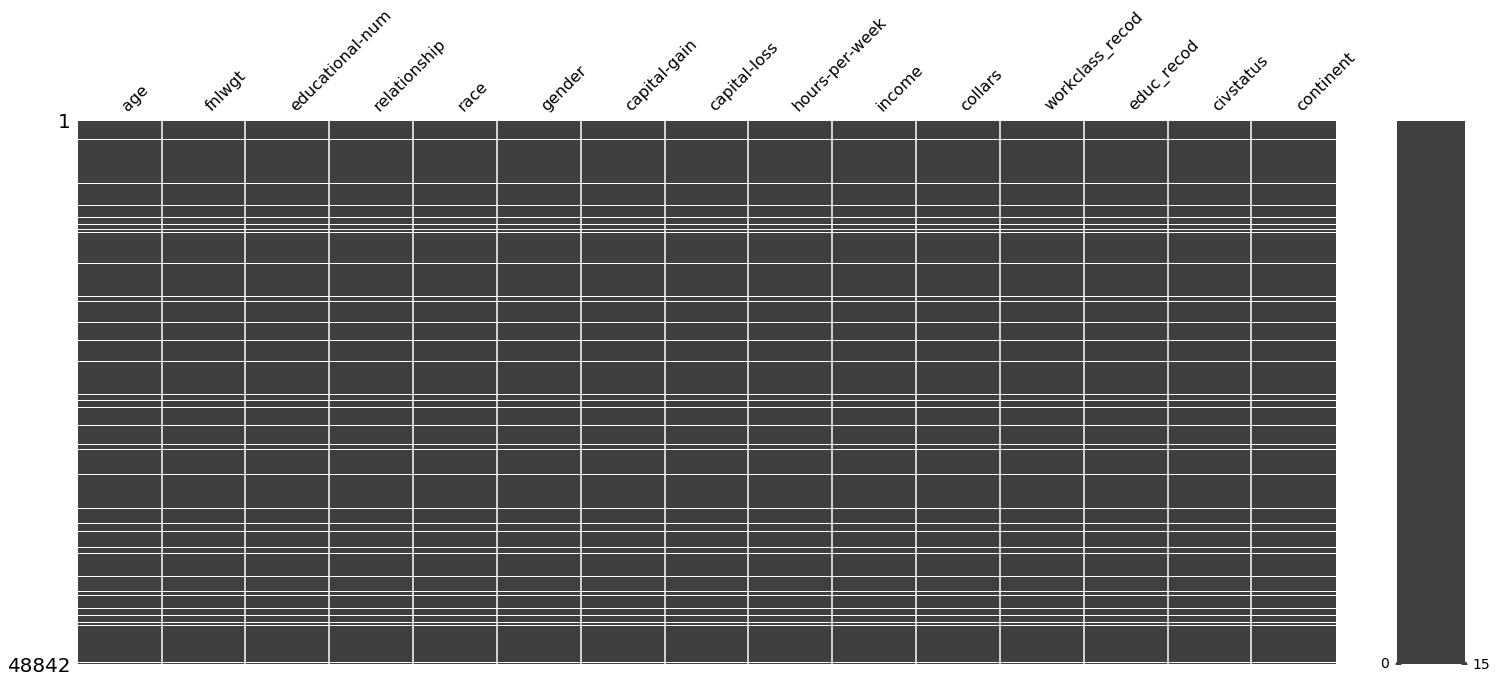

In [34]:
msngo.matrix(df_recod_clean);

Los datos perdidos están distribuidos a lo largo de todas las variables del dataframe. ¿Cuál será la cantidad?

In [35]:
lost = df_recod_clean.shape[0] - df_recod_clean.dropna().shape[0]
print('Los datos perdidos son', lost, '(%{})'.format(100 * lost / df_recod_clean.shape[0]))

Los datos perdidos son 3620 (%7.411653904426518)


Son sólo el 7% y como se distribuyen columna a columna no hay mucho que hacer, así que podemos eliminarlos con seguridad.

Notar que esto ya se hizo con anterioridad, y el resultado final quedó guardado en la variable `df`:

In [36]:
print(lost + df.shape[0] == df_recod_clean.shape[0])

True


### Análisis descriptivo

Ahora veremos un análisis descriptivo de las variables del dataset. 

Para esto, me basaré el dataframe `df_recod` (aunque sin datos perdidos) para facilidad de análisis.

In [37]:
data = df_recod_clean.dropna().infer_objects()

### Inspección visual vector objetivo

Nuestro vector objetivo es `income`, el cual es una variable binaria. Veamos como se distribuye:

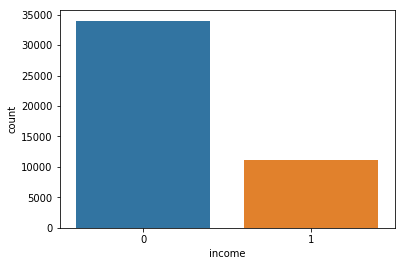

In [38]:
sns.countplot(x=data['income']);

Las personas con ingreso >= 50k corresponden a aproximadamente un 25% del dataset.

### Inspeción visual de Variables

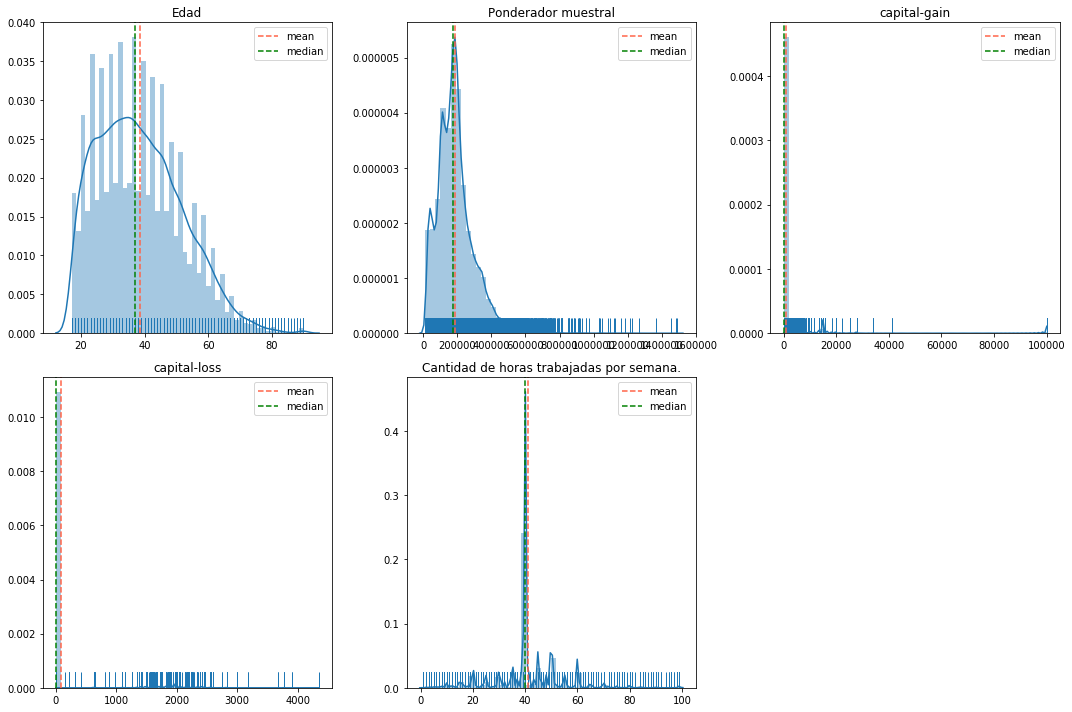

In [39]:
numeric_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
nicos.plot_columns_behaviour(data[numeric_columns], 'numeric')

- Los gráficos que se ven más simétricos son el de la edad y de la cantidad de horas trabajadas.
- La edad de los sujetos de la muestra se encuentra mayoritaria mente entre el rango 25 - 55 años.
    - Se puede ver que desde aproximadamente los 50 años la frecuencia comienza a disminuir considerablemente. 
    - Existen algunos outliers > 80 años
- La mayoría de las personas no tiene ingresos adicionales al trabajo asalariado, pero existen personas en la muestra que ganan cerca de 20k, y otras pocas cercanas a 100k.
- La mayoría de las personas no tiene pérdidas de capital, pero existen unos pocos que sí.
- La mayortía de las personas trabajan alrededor de 40 horas semanales, pero existen algunos outliers que trabajan cerca de 60 horas.

De hecho si vemos el `skew`, la edad y las horas trabajadas < 0.5:

In [40]:
data[numeric_columns].skew()

age                0.532816
fnlwgt             1.447516
capital-gain      11.789002
capital-loss       4.516304
hours-per-week     0.340545
dtype: float64

¿Existe alguna correlación entre estas variables?

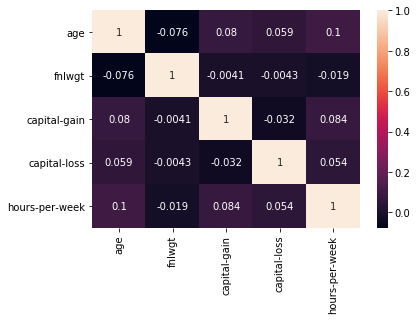

In [41]:
sns.heatmap(data[numeric_columns].corr(), annot=True)

No, no se ven correlaciones 😀

Para el resto de las variables, crearemos gráficos donde se comparará la frecuencia de cada variable categórica en 3 grupos:

- Ingresos menores 50k (`income = 0`)
- Ingresos mayores o iguales a 50k (`income = 1`)
- Global (independiente del `income`)

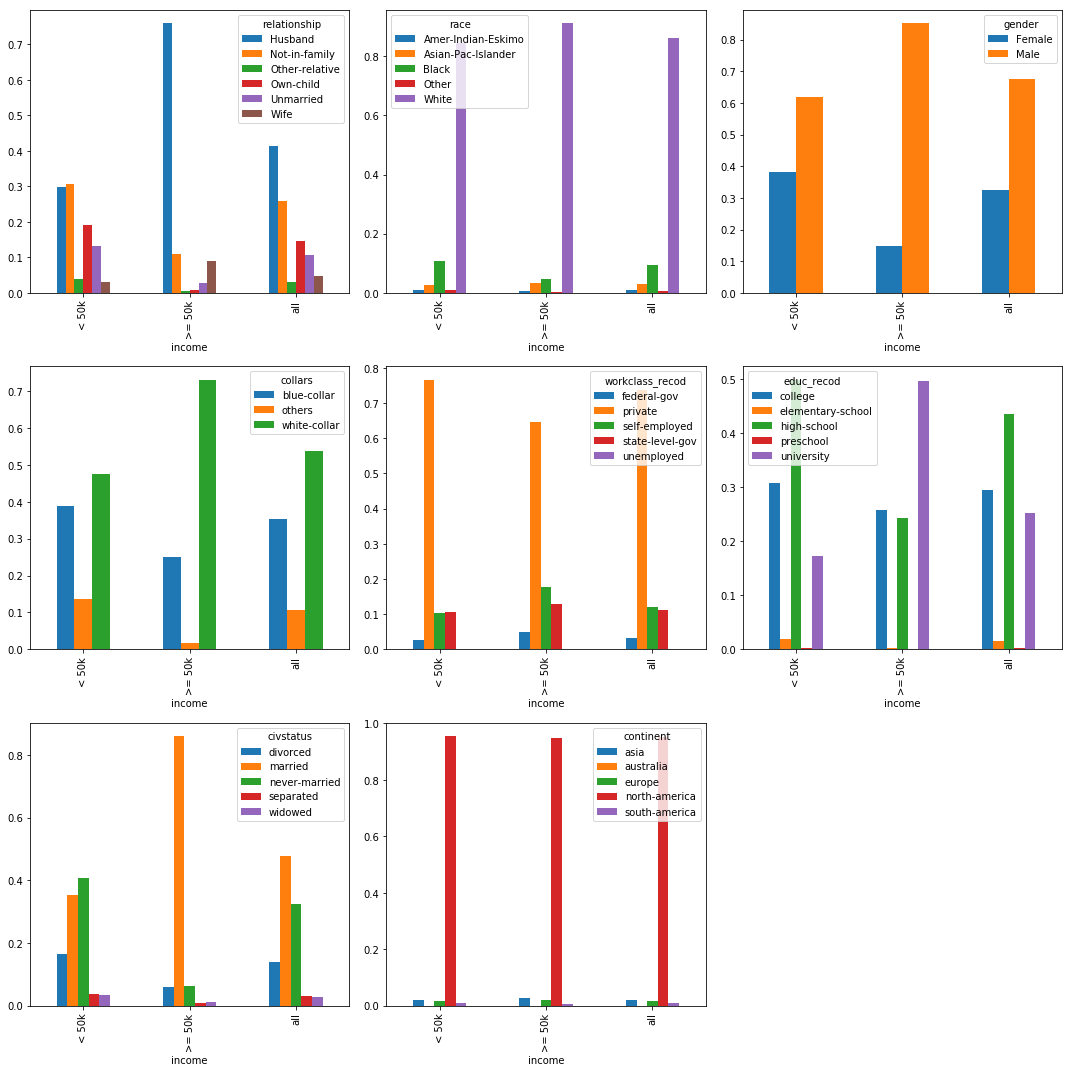

In [42]:
object_columns = list(filter(lambda x: data[x].dtype == np.object, data.columns))
grouped_by_income = data.groupby("income")
n_cols = 3
n_rows = int(np.ceil(len(object_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,15))

for i, col_name in enumerate(object_columns):
    n_row = int(i / n_cols)
    ax = axes[n_row, i % n_cols]
    g = grouped_by_income[col_name].value_counts(normalize=True).unstack()
    g = g.rename(index={0: '< 50k', 1: '>= 50k'})
    
    row = data[col_name].value_counts(normalize=True).to_frame()[col_name]
    row.name = 'all'
    g = g.append(row)
    g.plot.bar(ax=ax);

axes[n_rows - 1, n_cols - 1].set_visible(False)
fig.tight_layout();

### Observaciones

- La relación entre el encuestado y su familia:
    - A nivel global, está bien distribuida, donde la mayoría son esposos (la mayoría de los encuestados son hombres).
    - Para income >= 50k, la diferencia aumenta muchísimo. La mayor frecuencia se lo llevan los esposos y las esposas.
- La raza del encuestado
    - En todos los grupos se encuentra sobrerepresentada por los blancos.
    - La distribución tiende a ser similar en los 3 grupos, aunque hay una menor frecuencia de sujetos con raza negra para ingresos superiores.
- El género:
    - A nivel global, sólo cerca del 33% son mujeres.
    - Para income >= 50k, hay mucho más hombres que mujeres.
- Profesiones:
    - La mayoría trabaja en profesiones `white-collar`.
    - Las observaciones `white-collar` aumentan considerablemente en el grupo de `income = 1`, mientras que `others` disminuye drásticamente.
- Sector de trabajo:
    - La mayoría trabaja en el sector privado, y muy pocos están cesantes.
    - La clase `federal-gov` está representada muy similar en los distintos grupos de income.
    - La clase frecuencia de la clase `private` disminuye en el grupo `income = 1` para repartirse en los grupos, mayoritariamente en `self-employed`
- Estudios:
    - La mayoría salió del colegio y estudios superiores.
    - Muy pocos se quedaron en la educación básica.
    - Prácticamente nadie que haya estudiado hasta la prescuela tiene ingresos superiores a 50k, y una pequeña cantidad (cercano al 0%) que llegó a la básica se encuentra en dicho grupo.
    - Aquellos que no continuaron estudios universitarios pero que llegaron hasta college, tienen una frecuencia muy similar en los dos grupos de ingreso.
    - Aquellos con estudios superiores tienen una frecuencia mucho mayor en el grupo de ingresos superiores a 50k en comparación al grupo `income = 0`.
- Estado civil:
    - A nivel global: la mayoría está casado, seguido por aquellos que nunca lo hicieron. La tercera categoría no menor es la de divorciados.
    - En el grupo de ingresos < 50k: la tendencia se parece a la global.
    - En el grupo de ingresos >= 50k: la tendencia se rompe y los casados son los con mayor frecuencia.
- Continente: 
    - Sobrerepresentado por los norteamericanos.
    - La tendencia a nivel global es muy parecida en ambos grupos.

Finalmente, ¿cómo es la correlación a nivel global de nuestro dataframe?

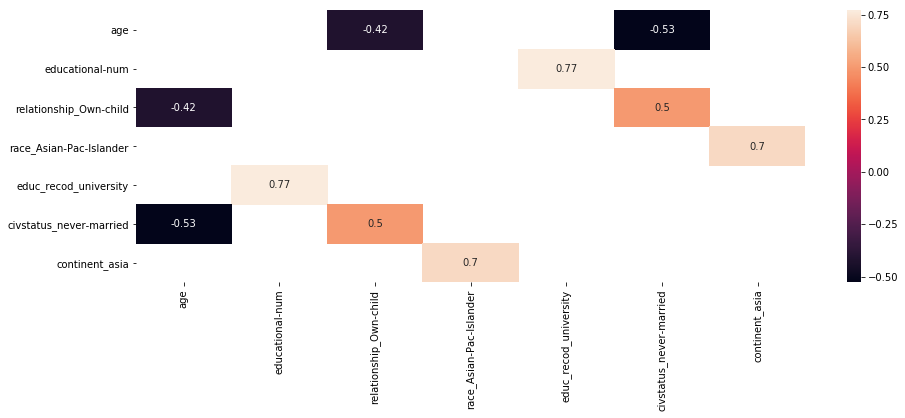

In [43]:
nicos.plot_main_correlations(df)

Las principales correlaciones que se ven:

- Para edades altas, vivir con tu hijo tiende a ser falso, al igual que nunca haberse casado.
- Para un alto nivel educacional, la mayoría tiende a ser universitarios.
- Las personas que viven en asia, tienden a ser de raza asiática. 

Modelación descriptiva
---

### Modelación de regresión

In [48]:
def build_model(df, target, *banned_columns):
    regressors = [item for item in df.columns if item not in banned_columns]
    return smf.logit('{} ~ {}'.format(target, ' + '.join(regressors)), df)

def not_significant_pvalues(model, alpha = 0.025):
    pvalues_df = model.pvalues.to_frame()
    pvalues_df = pvalues_df[pvalues_df > alpha].dropna()
    return pvalues_df

models = {}

In [49]:
models['result_1'] = build_model(df, 'income', 'income').fit()
models['result_1'].summary()

Optimization terminated successfully.
         Current function value: 0.331496
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45187
Method:                           MLE   Df Model:                           34
Date:                Wed, 24 Jul 2019   Pseudo R-squ.:                  0.4080
Time:                        17:54:33   Log-Likelihood:                -14991.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -5.5773      0.175    -31.922      0.000      -5.920      -5.235
age                               0.0254      0.001     18.733      0.000       0.023       0.028
fnlwgt                         7.531e-07    1.4e-07      5.377      0.000    4.79e-07    1.03e-06
educationalnum                    0.2768      0.016     17.247      0.000       0.245       0.308
capitalgain                       0.0003   8.61e-06     36.862      0.000       0.000       0.000
capitalloss                       0.0007   3.08e-05     21.288      0.000       0.001       0.001
hoursperweek                      0.0296      0.001     22.457      0.000       0.027       0.032
relationship_Notinfamily         -0.9582      0.134     -7.150      0.000      -1.221      -0.696
relationship_Ownchild            -1.9375      0.166    -11.647      0.000      -2.264      -1.611
relationship_Unmarried           -1.1886      0.151     -7.894      0.000      -1.484      -0.893
relationship_Wife                 1.0596      0.084     12.590      0.000       0.895       1.225
relationship_Otherrelative       -1.4156      0.187     -7.558      0.000      -1.783      -1.049
race_Black                       -0.2417      0.063     -3.839      0.000      -0.365      -0.118
race_AsianPacIslander             0.2305      0.129      1.790      0.073      -0.022       0.483
race_AmerIndianEskimo            -0.5100      0.180     -2.838      0.005      -0.862      -0.158
race_Other                       -0.2368      0.206     -1.150      0.250      -0.640       0.167
gender_Female                    -0.7793      0.064    -12.123      0.000      -0.905      -0.653
collars_bluecollar               -0.6022      0.035    -17.019      0.000      -0.672      -0.533
collars_others                   -1.3279      0.086    -15.481      0.000      -1.496      -1.160
workclass_recod_selfemployed     -0.3408      0.042     -8.066      0.000      -0.424      -0.258
workclass_recod_statelevelgov    -0.0771      0.046     -1.680      0.093      -0.167       0.013
workclass_recod_federalgov        0.4439      0.075      5.920      0.000       0.297       0.591
workclass_recod_unemployed       -1.1121      0.800     -1.390      0.164      -2.680       0.456
educ_recod_college                0.0643      0.047      1.375      0.169      -0.027       0.156
educ_recod_university             0.1520      0.086      1.766      0.077      -0.017       0.321
educ_recod_elementaryschool       0.2154      0.223      0.965      0.334      -0.222       0.653
educ_recod_preschool             -3.9145      4.042     -0.968      0.333     -11.838       4.009
civstatus_nevermarried           -1.2948      0.137     -9.466      0.000      -1.563      -1.027
civstatus_divorced               -0.8092      0.139     -5.842      0.000      -1.081      -0.538
civstatus_separated              -0.8358      0.178     -4.685      0.000      -1.185      -0.486
civstat

Los regresores no significativos al 95% son:

In [53]:
banned_columns = models['result_1'].pvalues[models['result_1'].pvalues > 0.025].index
banned_columns

Index(['race_AsianPacIslander', 'race_Other', 'workclass_recod_statelevelgov',
       'workclass_recod_unemployed', 'educ_recod_college',
       'educ_recod_university', 'educ_recod_elementaryschool',
       'educ_recod_preschool', 'continent_europe', 'continent_australia'],
      dtype='object')

Construimos un nuevo modelo quitando estos

In [54]:
models['result_2'] = build_model(df, 'income', 'income', *banned_columns).fit()
models['result_2'].summary()

Optimization terminated successfully.
         Current function value: 0.331746
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45197
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Jul 2019   Pseudo R-squ.:                  0.4075
Time:                        17:57:27   Log-Likelihood:                -15002.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.7349      0.130    -44.104      0.000      -5.990      -5.480
age                              0.0253      0.001     18.780      0.000       0.023       0.028
fnlwgt                        7.464e-07    1.4e-07      5.338      0.000    4.72e-07    1.02e-06
educationalnum                   0.2982      0.007     41.516      0.000       0.284       0.312
capitalgain                      0.0003    8.6e-06     36.892      0.000       0.000       0.000
capitalloss                      0.0007   3.08e-05     21.290      0.000       0.001       0.001
hoursperweek                     0.0297      0.001     22.480      0.000       0.027       0.032
relationship_Notinfamily        -0.9470      0.134     -7.076      0.000      -1.209      -0.685
relationship_Ownchild           -1.9235      0.166    -11.586      0.000      -2.249      -1.598
relationship_Unmarried          -1.1794      0.150     -7.842      0.000      -1.474      -0.885
relationship_Wife                1.0583      0.084     12.583      0.000       0.893       1.223
relationship_Otherrelative      -1.4020      0.187     -7.480      0.000      -1.769      -1.035
race_Black                      -0.2526      0.063     -4.022      0.000      -0.376      -0.130
race_AmerIndianEskimo           -0.5251      0.179     -2.926      0.003      -0.877      -0.173
gender_Female                   -0.7853      0.064    -12.233      0.000      -0.911      -0.660
collars_bluecollar              -0.6135      0.035    -17.499      0.000      -0.682      -0.545
collars_others                  -1.3328      0.086    -15.564      0.000      -1.501      -1.165
workclass_recod_selfemployed    -0.3279      0.042     -7.884      0.000      -0.409      -0.246
workclass_recod_federalgov       0.4570      0.074      6.143      0.000       0.311       0.603
civstatus_nevermarried          -1.2982      0.137     -9.500      0.000      -1.566      -1.030
civstatus_divorced              -0.8204      0.138     -5.931      0.000      -1.092      -0.549
civstatus_separated             -0.8504      0.178     -4.772      0.000      -1.200      -0.501
civstatus_widowed               -0.7314      0.176     -4.157      0.000      -1.076      -0.387
continent_asia                  -0.1943      0.100     -1.947      0.051      -0.390       0.001
continent_southamerica          -0.7122      0.172     -4.141      0.000      -1.049      -0.375
================================================================================================
"""

En este caso solo existe un `p-value` no significativo:

In [59]:
banned_columns_2 = models['result_2'].pvalues[models['result_2'].pvalues > 0.025].index
banned_columns_2

Index(['continent_asia'], dtype='object')

In [60]:
models['result_3'] = build_model(df, 'income', 'income', *banned_columns, *banned_columns_2).fit()
models['result_3'].summary()

Optimization terminated successfully.
         Current function value: 0.331789
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45198
Method:                           MLE   Df Model:                           23
Date:                Wed, 24 Jul 2019   Pseudo R-squ.:                  0.4075
Time:                        17:59:13   Log-Likelihood:                -15004.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.7302      0.130    -44.088      0.000      -5.985      -5.475
age                              0.0253      0.001     18.805      0.000       0.023       0.028
fnlwgt                        7.487e-07    1.4e-07      5.355      0.000    4.75e-07    1.02e-06
educationalnum                   0.2970      0.007     41.532      0.000       0.283       0.311
capitalgain                      0.0003   8.59e-06     36.912      0.000       0.000       0.000
capitalloss                      0.0007   3.08e-05     21.288      0.000       0.001       0.001
hoursperweek                     0.0297      0.001     22.510      0.000       0.027       0.032
relationship_Notinfamily        -0.9601      0.134     -7.180      0.000      -1.222      -0.698
relationship_Ownchild           -1.9373      0.166    -11.673      0.000      -2.263      -1.612
relationship_Unmarried          -1.1946      0.150     -7.950      0.000      -1.489      -0.900
relationship_Wife                1.0562      0.084     12.560      0.000       0.891       1.221
relationship_Otherrelative      -1.4267      0.187     -7.632      0.000      -1.793      -1.060
race_Black                      -0.2486      0.063     -3.962      0.000      -0.372      -0.126
race_AmerIndianEskimo           -0.5220      0.179     -2.909      0.004      -0.874      -0.170
gender_Female                   -0.7837      0.064    -12.211      0.000      -0.910      -0.658
collars_bluecollar              -0.6129      0.035    -17.486      0.000      -0.682      -0.544
collars_others                  -1.3395      0.086    -15.648      0.000      -1.507      -1.172
workclass_recod_selfemployed    -0.3268      0.042     -7.859      0.000      -0.408      -0.245
workclass_recod_federalgov       0.4568      0.074      6.138      0.000       0.311       0.603
civstatus_nevermarried          -1.2830      0.136     -9.400      0.000      -1.551      -1.016
civstatus_divorced              -0.8040      0.138     -5.820      0.000      -1.075      -0.533
civstatus_separated             -0.8357      0.178     -4.693      0.000      -1.185      -0.487
civstatus_widowed               -0.7163      0.176     -4.075      0.000      -1.061      -0.372
continent_southamerica          -0.7068      0.172     -4.111      0.000      -1.044      -0.370
================================================================================================
"""

Llegamos finalmente a un modelo donde todos los regresores son significativos al 95%:

In [61]:
models['result_3'].pvalues[models['result_3'].pvalues > 0.025]

Series([], dtype: float64)